In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import os

# ML imports
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import xgboost as xgb

In [2]:
# Read in crowd data
crowd_data = pd.read_csv('/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/sensor_data.csv')

In [3]:
# Explore the Dataset
crowd_data.head()

,timestamp,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,CMSA-GAWW-14_220,CMSA-GAWW-15_30,CMSA-GAWW-15_210,CMSA-GAWW-16_30,CMSA-GAWW-16_210,CMSA-GAWW-17_40,CMSA-GAWW-17_220,CMSA-GAWW-19_115,CMSA-GAWW-19_295,CMSA-GAWW-20_120,CMSA-GAWW-20_300,CMSA-GAWW-21_120,CMSA-GAWW-21_300,CMSA-GAWW-23_109,CMSA-GAWW-23_289,GACM-04_50,GACM-04_230,GASA-01-A1_135,GASA-01-A1_315,GASA-01-A2_135,GASA-01-A2_315,GASA-01-B_135,GASA-01-B_315,GASA-01-C_135,GASA-01-C_315,GASA-02-01_135,GASA-02-01_315,GASA-02-02_135,GASA-02-02_315,GASA-03_105,...,GASA-04_135,GASA-04_315,GASA-05-O_135,GASA-05-O_315,GASA-05-W_135,GASA-05-W_315,GASA-06_95,GASA-06_275,GASA-06-B_95,GASA-06-B_275,GVCV-01_40,GVCV-01_220,GVCV-03_42,GVCV-03_222,GVCV-04_45,GVCV-04_225,GVCV-05-A_155,GVCV-05-A_335,GVCV-05-B_30,GVCV-05-B_210,GVCV-06_95,GVCV-06_275,GVCV-07_50,GVCV-07_230,GVCV-08_45,GVCV-08_225,GVCV-09_80,GVCV-09_260,GVCV-11_50,GVCV-11_230,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend
0,2025-08-20 00:00:00+02:00,15,4,29,33,44,28,42,37,11,3,21,26,73,41,19,28,27,31,27,50,33,45,12,13,20,8,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,2,0,0,0,55,59,41,40,0,0,0,0,20,8,2,0
1,2025-08-20 00:03:00+02:00,1,3,21,29,34,39,9,14,6,6,17,27,9,18,16,4,13,5,5,9,32,33,9,16,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,20,8,2,0
2,2025-08-20 00:06:00+02:00,5,4,35,22,29,34,33,42,14,3,39,50,48,53,17,15,53,41,21,32,36,35,2,8,17,5,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,85,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,20,8,2,0
3,2025-08-20 00:09:00+02:00,4,4,40,47,42,40,19,34,15,2,39,46,37,26,21,14,31,6,29,31,30,37,5,0,30,17,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,20,8,2,0
4,2025-08-20 00:12:00+02:00,4,11,54,59,58,33,17,33,26,9,18,34,25,27,5,9,19,17,19,22,33,37,6,0,28,12,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,57,0,0,0,12,20,8,2,0


In [4]:
crowd_data.tail()

,timestamp,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,CMSA-GAWW-14_220,CMSA-GAWW-15_30,CMSA-GAWW-15_210,CMSA-GAWW-16_30,CMSA-GAWW-16_210,CMSA-GAWW-17_40,CMSA-GAWW-17_220,CMSA-GAWW-19_115,CMSA-GAWW-19_295,CMSA-GAWW-20_120,CMSA-GAWW-20_300,CMSA-GAWW-21_120,CMSA-GAWW-21_300,CMSA-GAWW-23_109,CMSA-GAWW-23_289,GACM-04_50,GACM-04_230,GASA-01-A1_135,GASA-01-A1_315,GASA-01-A2_135,GASA-01-A2_315,GASA-01-B_135,GASA-01-B_315,GASA-01-C_135,GASA-01-C_315,GASA-02-01_135,GASA-02-01_315,GASA-02-02_135,GASA-02-02_315,GASA-03_105,...,GASA-04_135,GASA-04_315,GASA-05-O_135,GASA-05-O_315,GASA-05-W_135,GASA-05-W_315,GASA-06_95,GASA-06_275,GASA-06-B_95,GASA-06-B_275,GVCV-01_40,GVCV-01_220,GVCV-03_42,GVCV-03_222,GVCV-04_45,GVCV-04_225,GVCV-05-A_155,GVCV-05-A_335,GVCV-05-B_30,GVCV-05-B_210,GVCV-06_95,GVCV-06_275,GVCV-07_50,GVCV-07_230,GVCV-08_45,GVCV-08_225,GVCV-09_80,GVCV-09_260,GVCV-11_50,GVCV-11_230,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend
2395,2025-08-24 23:45:00+02:00,11,9,38,44,51,51,6,19,18,18,22,66,35,42,12,8,18,11,0,0,28,29,7,3,24,18,0,0,0,0,1,0,8,4,0,1,4,1,10,...,3,8,5,3,3,7,0,0,0,0,34,23,6,24,3,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,10,12,0,0,23,45,24,8,6,1
2396,2025-08-24 23:48:00+02:00,2,1,46,42,30,45,34,33,8,1,19,41,29,28,14,17,24,12,0,0,22,42,16,4,29,14,0,0,0,3,1,1,4,1,0,4,0,0,5,...,5,7,9,6,2,1,0,0,0,0,3,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,23,6,23,48,24,8,6,1
2397,2025-08-24 23:51:00+02:00,10,2,51,26,42,59,21,30,22,9,29,53,46,31,12,20,44,18,0,0,32,44,6,27,32,14,0,0,1,2,1,8,7,2,0,0,2,4,10,...,11,7,1,5,11,14,0,0,0,0,0,0,18,1,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,23,51,24,8,6,1
2398,2025-08-24 23:54:00+02:00,3,1,24,36,42,32,12,55,9,8,35,40,49,28,18,10,47,27,0,0,38,65,14,6,36,22,0,0,0,5,1,0,1,5,0,3,0,7,9,...,3,12,6,2,3,3,0,0,0,0,0,0,4,0,11,5,0,0,25,4,0,0,0,0,0,0,0,0,0,0,0,0,2,8,23,54,24,8,6,1
2399,2025-08-24 23:57:00+02:00,6,1,38,65,56,41,21,45,10,3,41,34,38,48,9,13,39,40,0,0,46,78,8,3,32,11,0,0,0,2,0,0,2,3,1,6,0,0,5,...,7,3,9,1,0,5,0,0,0,0,0,0,3,31,19,1,0,0,0,0,0,0,1,8,0,0,0,0,0,0,79,2,1,2,23,57,24,8,6,1


In [5]:
crowd_data.info

<bound method DataFrame.info of                       timestamp  CMSA-GAKH-01_0  ...  weekday  is_weekend
0     2025-08-20 00:00:00+02:00              15  ...        2           0
1     2025-08-20 00:03:00+02:00               1  ...        2           0
2     2025-08-20 00:06:00+02:00               5  ...        2           0
3     2025-08-20 00:09:00+02:00               4  ...        2           0
4     2025-08-20 00:12:00+02:00               4  ...        2           0
...                         ...             ...  ...      ...         ...
2395  2025-08-24 23:45:00+02:00              11  ...        6           1
2396  2025-08-24 23:48:00+02:00               2  ...        6           1
2397  2025-08-24 23:51:00+02:00              10  ...        6           1
2398  2025-08-24 23:54:00+02:00               3  ...        6           1
2399  2025-08-24 23:57:00+02:00               6  ...        6           1

[2400 rows x 81 columns]>

In [6]:
crowd_data.describe()

,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,CMSA-GAWW-14_220,CMSA-GAWW-15_30,CMSA-GAWW-15_210,CMSA-GAWW-16_30,CMSA-GAWW-16_210,CMSA-GAWW-17_40,CMSA-GAWW-17_220,CMSA-GAWW-19_115,CMSA-GAWW-19_295,CMSA-GAWW-20_120,CMSA-GAWW-20_300,CMSA-GAWW-21_120,CMSA-GAWW-21_300,CMSA-GAWW-23_109,CMSA-GAWW-23_289,GACM-04_50,GACM-04_230,GASA-01-A1_135,GASA-01-A1_315,GASA-01-A2_135,GASA-01-A2_315,GASA-01-B_135,GASA-01-B_315,GASA-01-C_135,GASA-01-C_315,GASA-02-01_135,GASA-02-01_315,GASA-02-02_135,GASA-02-02_315,GASA-03_105,GASA-03_285,GASA-04_135,GASA-04_315,GASA-05-O_135,GASA-05-O_315,GASA-05-W_135,GASA-05-W_315,GASA-06_95,GASA-06_275,GASA-06-B_95,GASA-06-B_275,GVCV-01_40,GVCV-01_220,GVCV-03_42,GVCV-03_222,GVCV-04_45,GVCV-04_225,GVCV-05-A_155,GVCV-05-A_335,GVCV-05-B_30,GVCV-05-B_210,GVCV-06_95,GVCV-06_275,GVCV-07_50,GVCV-07_230,GVCV-08_45,GVCV-08_225,GVCV-09_80,GVCV-09_260,GVCV-11_50,GVCV-11_230,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.00000,2400.00000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.0,2400.000000,2400.00
mean,57.513750,49.180000,37.840417,37.500417,39.021250,43.677500,20.566250,24.223333,17.682917,10.912083,25.784167,27.667083,31.23875,25.06875,23.668750,23.293333,34.465417,17.748333,24.972917,23.927083,58.222917,59.276667,8.055833,10.520000,53.148333,81.325833,10.286667,9.795417,28.301667,36.690833,12.271667,35.267083,27.609583,8.835833,15.065833,95.525000,126.797083,16.235417,110.038333,103.021667,64.394167,50.521667,17.455833,15.695417,15.971667,14.558750,0.001250,0.004167,4.695833,3.246667,12.857500,7.854583,24.338750,23.085000,21.938750,19.191250,17.906667,16.173750,17.583750,19.356250,7.391250,8.072500,6.209583,8.433750,4.374583,2.887083,0.023750,0.023333,30.751250,26.324167,32.629583,28.449583,24.782083,16.878750,11.500000,28.500000,22.000000,8.0,4.000000,0.40
std,69.204386,58.768898,36.631952,33.478431,34.266092,40.235263,24.612406,24.260349,16.685324,13.344451,28.954019,32.774489,33.65118,24.16050,22.823604,20.753536,32.638988,17.208042,28.269863,26.047094,50.850408,49.511462,8.574236,11.152343,47.832673,75.470229,13.687648,11.568787,29.047787,41.094299,15.272335,39.664484,34.049551,10.697152,26.771738,121.908521,146.770072,24.399362,124.482593,120.220245,64.901725,56.389991,22.848919,18.713615,23.324648,21.168016,0.035341,0.111749,13.794175,9.120790,26.865087,16.931245,42.988747,46.547813,42.007929,41.697651,52.999898,33.729056,36.558057,53.550708,25.732355,27.696032,20.133647,27.738698,13.043076,11.734175,0.232469,0.226149,78.573926,58.907717,67.133867,53.724243,57.345319,35.979428,6.923629,17.302449,1.414508,0.0,1.414508,0.49
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [7]:
# Check for missing values 
crowd_data.isna().sum()

timestamp           0
CMSA-GAKH-01_0      0
CMSA-GAKH-01_180    0
CMSA-GAWW-11_120    0
CMSA-GAWW-11_300    0
                   ..
minute              0
day                 0
month               0
weekday             0
is_weekend          0
Length: 81, dtype: int64

In [8]:
# Check duplicates
crowd_data.duplicated().sum()

np.int64(0)

In [9]:
crowd_data.columns[1:-6]

Index(['CMSA-GAKH-01_0', 'CMSA-GAKH-01_180', 'CMSA-GAWW-11_120',
       'CMSA-GAWW-11_300', 'CMSA-GAWW-12_115', 'CMSA-GAWW-12_295',
       'CMSA-GAWW-13_120', 'CMSA-GAWW-13_300', 'CMSA-GAWW-14_40',
       'CMSA-GAWW-14_220', 'CMSA-GAWW-15_30', 'CMSA-GAWW-15_210',
       'CMSA-GAWW-16_30', 'CMSA-GAWW-16_210', 'CMSA-GAWW-17_40',
       'CMSA-GAWW-17_220', 'CMSA-GAWW-19_115', 'CMSA-GAWW-19_295',
       'CMSA-GAWW-20_120', 'CMSA-GAWW-20_300', 'CMSA-GAWW-21_120',
       'CMSA-GAWW-21_300', 'CMSA-GAWW-23_109', 'CMSA-GAWW-23_289',
       'GACM-04_50', 'GACM-04_230', 'GASA-01-A1_135', 'GASA-01-A1_315',
       'GASA-01-A2_135', 'GASA-01-A2_315', 'GASA-01-B_135', 'GASA-01-B_315',
       'GASA-01-C_135', 'GASA-01-C_315', 'GASA-02-01_135', 'GASA-02-01_315',
       'GASA-02-02_135', 'GASA-02-02_315', 'GASA-03_105', 'GASA-03_285',
       'GASA-04_135', 'GASA-04_315', 'GASA-05-O_135', 'GASA-05-O_315',
       'GASA-05-W_135', 'GASA-05-W_315', 'GASA-06_95', 'GASA-06_275',
       'GASA-06-B_95', 'GASA-0

In [11]:
sensor_cols = [c for c in crowd_data.columns[1:-6]]
sensor_cols

['CMSA-GAKH-01_0',
 'CMSA-GAKH-01_180',
 'CMSA-GAWW-11_120',
 'CMSA-GAWW-11_300',
 'CMSA-GAWW-12_115',
 'CMSA-GAWW-12_295',
 'CMSA-GAWW-13_120',
 'CMSA-GAWW-13_300',
 'CMSA-GAWW-14_40',
 'CMSA-GAWW-14_220',
 'CMSA-GAWW-15_30',
 'CMSA-GAWW-15_210',
 'CMSA-GAWW-16_30',
 'CMSA-GAWW-16_210',
 'CMSA-GAWW-17_40',
 'CMSA-GAWW-17_220',
 'CMSA-GAWW-19_115',
 'CMSA-GAWW-19_295',
 'CMSA-GAWW-20_120',
 'CMSA-GAWW-20_300',
 'CMSA-GAWW-21_120',
 'CMSA-GAWW-21_300',
 'CMSA-GAWW-23_109',
 'CMSA-GAWW-23_289',
 'GACM-04_50',
 'GACM-04_230',
 'GASA-01-A1_135',
 'GASA-01-A1_315',
 'GASA-01-A2_135',
 'GASA-01-A2_315',
 'GASA-01-B_135',
 'GASA-01-B_315',
 'GASA-01-C_135',
 'GASA-01-C_315',
 'GASA-02-01_135',
 'GASA-02-01_315',
 'GASA-02-02_135',
 'GASA-02-02_315',
 'GASA-03_105',
 'GASA-03_285',
 'GASA-04_135',
 'GASA-04_315',
 'GASA-05-O_135',
 'GASA-05-O_315',
 'GASA-05-W_135',
 'GASA-05-W_315',
 'GASA-06_95',
 'GASA-06_275',
 'GASA-06-B_95',
 'GASA-06-B_275',
 'GVCV-01_40',
 'GVCV-01_220',
 'GVCV-03_42',

In [12]:
# Add total_crowd count per time stamp
crowd_data['total_crowd'] = crowd_data[sensor_cols].sum(axis=1)

In [13]:
crowd_data.head()

,timestamp,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,CMSA-GAWW-14_220,CMSA-GAWW-15_30,CMSA-GAWW-15_210,CMSA-GAWW-16_30,CMSA-GAWW-16_210,CMSA-GAWW-17_40,CMSA-GAWW-17_220,CMSA-GAWW-19_115,CMSA-GAWW-19_295,CMSA-GAWW-20_120,CMSA-GAWW-20_300,CMSA-GAWW-21_120,CMSA-GAWW-21_300,CMSA-GAWW-23_109,CMSA-GAWW-23_289,GACM-04_50,GACM-04_230,GASA-01-A1_135,GASA-01-A1_315,GASA-01-A2_135,GASA-01-A2_315,GASA-01-B_135,GASA-01-B_315,GASA-01-C_135,GASA-01-C_315,GASA-02-01_135,GASA-02-01_315,GASA-02-02_135,GASA-02-02_315,GASA-03_105,...,GASA-04_315,GASA-05-O_135,GASA-05-O_315,GASA-05-W_135,GASA-05-W_315,GASA-06_95,GASA-06_275,GASA-06-B_95,GASA-06-B_275,GVCV-01_40,GVCV-01_220,GVCV-03_42,GVCV-03_222,GVCV-04_45,GVCV-04_225,GVCV-05-A_155,GVCV-05-A_335,GVCV-05-B_30,GVCV-05-B_210,GVCV-06_95,GVCV-06_275,GVCV-07_50,GVCV-07_230,GVCV-08_45,GVCV-08_225,GVCV-09_80,GVCV-09_260,GVCV-11_50,GVCV-11_230,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend,total_crowd
0,2025-08-20 00:00:00+02:00,15,4,29,33,44,28,42,37,11,3,21,26,73,41,19,28,27,31,27,50,33,45,12,13,20,8,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,2,0,0,0,55,59,41,40,0,0,0,0,20,8,2,0,931
1,2025-08-20 00:03:00+02:00,1,3,21,29,34,39,9,14,6,6,17,27,9,18,16,4,13,5,5,9,32,33,9,16,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,20,8,2,0,426
2,2025-08-20 00:06:00+02:00,5,4,35,22,29,34,33,42,14,3,39,50,48,53,17,15,53,41,21,32,36,35,2,8,17,5,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,85,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,20,8,2,0,788
3,2025-08-20 00:09:00+02:00,4,4,40,47,42,40,19,34,15,2,39,46,37,26,21,14,31,6,29,31,30,37,5,0,30,17,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,20,8,2,0,646
4,2025-08-20 00:12:00+02:00,4,11,54,59,58,33,17,33,26,9,18,34,25,27,5,9,19,17,19,22,33,37,6,0,28,12,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,57,0,0,0,12,20,8,2,0,799


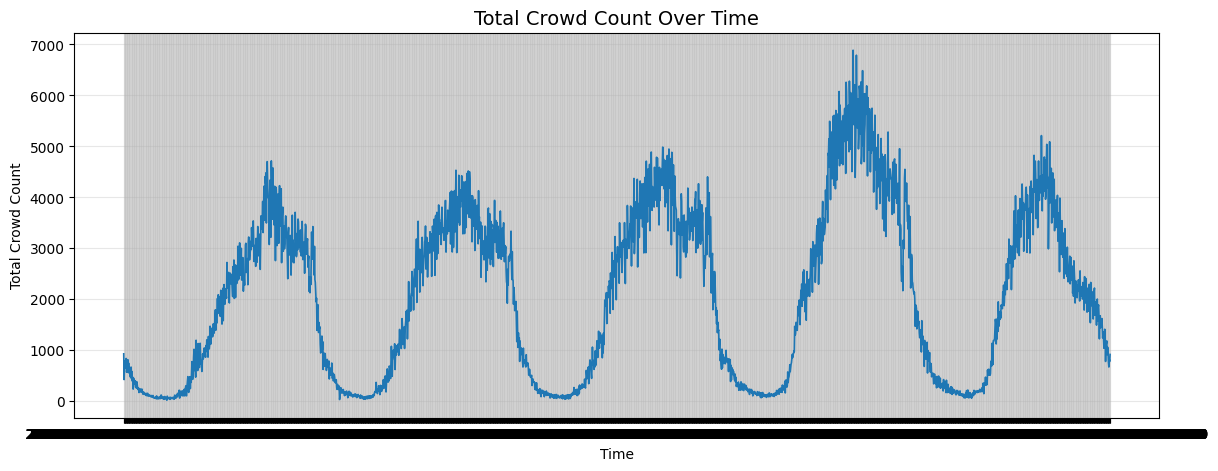

In [14]:
# Quick Overview - total crowd count over time
df = crowd_data

plt.figure(figsize=(14,5))
plt.plot(df['timestamp'], df['total_crowd'], lw=1.2)
plt.title("Total Crowd Count Over Time", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Total Crowd Count")
plt.grid(alpha=0.3)
plt.show()


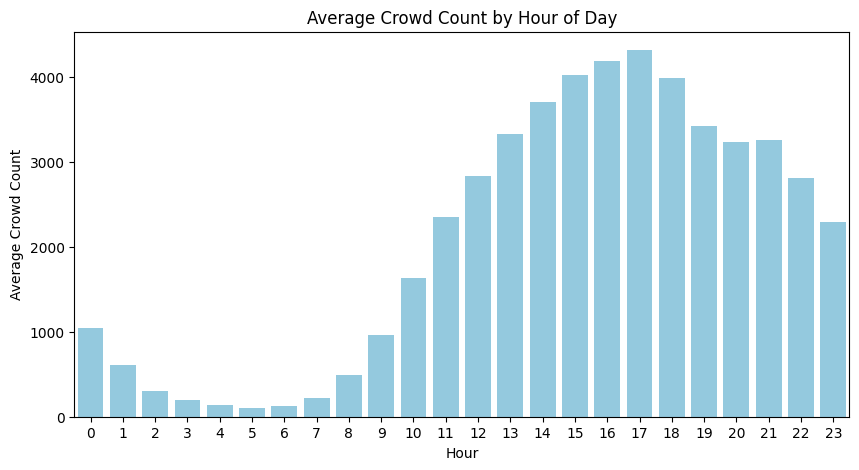

In [15]:
hourly_avg = df.groupby('hour')['total_crowd'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, color="skyblue")
plt.title("Average Crowd Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Crowd Count")
plt.show()


/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_10619/414375696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_avg.index, y=day_avg.values, palette="viridis")


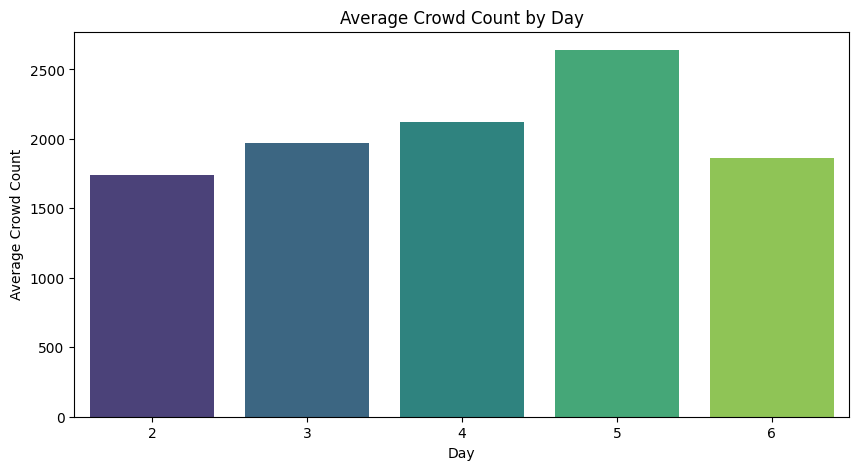

In [16]:
day_avg = df.groupby('weekday')['total_crowd'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=day_avg.index, y=day_avg.values, palette="viridis")
plt.title("Average Crowd Count by Day")
plt.xlabel("Day")
plt.ylabel("Average Crowd Count")
plt.show()


In [17]:
# Read in weather data
weather_data = pd.read_csv('/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/weather_data_cleaned.csv')

In [18]:
type(weather_data['timestamp'][0])

str

In [19]:
type(crowd_data['timestamp'][0])

str

In [20]:
crowd_data['timestamp'] = pd.to_datetime(crowd_data['timestamp'], utc=False)

In [21]:
type(crowd_data['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], utc=False)

In [23]:
type(weather_data['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
# Merge crowd and weather data

merged_df = pd.merge_asof(
    crowd_data,
    weather_data,
    on = 'timestamp',
    direction = 'nearest',
    tolerance = pd.Timedelta('30min')
)

In [25]:
merged_df.head()

,timestamp,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,CMSA-GAWW-14_220,CMSA-GAWW-15_30,CMSA-GAWW-15_210,CMSA-GAWW-16_30,CMSA-GAWW-16_210,CMSA-GAWW-17_40,CMSA-GAWW-17_220,CMSA-GAWW-19_115,CMSA-GAWW-19_295,CMSA-GAWW-20_120,CMSA-GAWW-20_300,CMSA-GAWW-21_120,CMSA-GAWW-21_300,CMSA-GAWW-23_109,CMSA-GAWW-23_289,GACM-04_50,GACM-04_230,GASA-01-A1_135,GASA-01-A1_315,GASA-01-A2_135,GASA-01-A2_315,GASA-01-B_135,GASA-01-B_315,GASA-01-C_135,GASA-01-C_315,GASA-02-01_135,GASA-02-01_315,GASA-02-02_135,GASA-02-02_315,GASA-03_105,...,GASA-06-B_275,GVCV-01_40,GVCV-01_220,GVCV-03_42,GVCV-03_222,GVCV-04_45,GVCV-04_225,GVCV-05-A_155,GVCV-05-A_335,GVCV-05-B_30,GVCV-05-B_210,GVCV-06_95,GVCV-06_275,GVCV-07_50,GVCV-07_230,GVCV-08_45,GVCV-08_225,GVCV-09_80,GVCV-09_260,GVCV-11_50,GVCV-11_230,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend,total_crowd,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precipitation,condition
0,2025-08-20 00:00:00+02:00,15,4,29,33,44,28,42,37,11,3,21,26,73,41,19,28,27,31,27,50,33,45,12,13,20,8,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,2,0,0,0,55,59,41,40,0,0,0,0,20,8,2,0,931,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
1,2025-08-20 00:03:00+02:00,1,3,21,29,34,39,9,14,6,6,17,27,9,18,16,4,13,5,5,9,32,33,9,16,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,20,8,2,0,426,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
2,2025-08-20 00:06:00+02:00,5,4,35,22,29,34,33,42,14,3,39,50,48,53,17,15,53,41,21,32,36,35,2,8,17,5,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,85,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,20,8,2,0,788,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
3,2025-08-20 00:09:00+02:00,4,4,40,47,42,40,19,34,15,2,39,46,37,26,21,14,31,6,29,31,30,37,5,0,30,17,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,20,8,2,0,646,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
4,2025-08-20 00:12:00+02:00,4,11,54,59,58,33,17,33,26,9,18,34,25,27,5,9,19,17,19,22,33,37,6,0,28,12,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,57,0,0,0,12,20,8,2,0,799,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy


In [26]:
merged_df.to_csv(
    '/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/crowd_weather_merged.csv',
    index=False
)


In [27]:
# === Settings ===
MERGED_CSV = '/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/crowd_weather_merged.csv'
OUT_DIR = '/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/models_xgb'
os.makedirs(OUT_DIR, exist_ok=True)

PAST_HOURS = 1          # number of past hours to use as input
PREDICT_HORIZON = 1     # predict 1 hour ahead
STEP_HOURS = 1          # move window by 1 hour each sample
TEST_SPLIT = 0.05
CALIB_SPLIT = 0.15
TRAIN_SPLIT = 0.80

RANDOM_STATE = 42

In [28]:
# === Load merged df (already has crowd sensors + weather) ===
merged_df = pd.read_csv(MERGED_CSV, parse_dates=['timestamp'])

In [29]:
merged_df.columns[1:-15]

Index(['CMSA-GAKH-01_0', 'CMSA-GAKH-01_180', 'CMSA-GAWW-11_120',
       'CMSA-GAWW-11_300', 'CMSA-GAWW-12_115', 'CMSA-GAWW-12_295',
       'CMSA-GAWW-13_120', 'CMSA-GAWW-13_300', 'CMSA-GAWW-14_40',
       'CMSA-GAWW-14_220', 'CMSA-GAWW-15_30', 'CMSA-GAWW-15_210',
       'CMSA-GAWW-16_30', 'CMSA-GAWW-16_210', 'CMSA-GAWW-17_40',
       'CMSA-GAWW-17_220', 'CMSA-GAWW-19_115', 'CMSA-GAWW-19_295',
       'CMSA-GAWW-20_120', 'CMSA-GAWW-20_300', 'CMSA-GAWW-21_120',
       'CMSA-GAWW-21_300', 'CMSA-GAWW-23_109', 'CMSA-GAWW-23_289',
       'GACM-04_50', 'GACM-04_230', 'GASA-01-A1_135', 'GASA-01-A1_315',
       'GASA-01-A2_135', 'GASA-01-A2_315', 'GASA-01-B_135', 'GASA-01-B_315',
       'GASA-01-C_135', 'GASA-01-C_315', 'GASA-02-01_135', 'GASA-02-01_315',
       'GASA-02-02_135', 'GASA-02-02_315', 'GASA-03_105', 'GASA-03_285',
       'GASA-04_135', 'GASA-04_315', 'GASA-05-O_135', 'GASA-05-O_315',
       'GASA-05-W_135', 'GASA-05-W_315', 'GASA-06_95', 'GASA-06_275',
       'GASA-06-B_95', 'GASA-0

In [30]:
# === Identify sensor columns and weather columns ===
sensor_cols = [c for c in merged_df.columns[1:-15]]
weather_cols = [c for c in merged_df.columns if c in ['temperature','precipitation','wind_speed','wind_gust','pressure','humidity','dew_point']]


In [31]:
sensor_cols

['CMSA-GAKH-01_0',
 'CMSA-GAKH-01_180',
 'CMSA-GAWW-11_120',
 'CMSA-GAWW-11_300',
 'CMSA-GAWW-12_115',
 'CMSA-GAWW-12_295',
 'CMSA-GAWW-13_120',
 'CMSA-GAWW-13_300',
 'CMSA-GAWW-14_40',
 'CMSA-GAWW-14_220',
 'CMSA-GAWW-15_30',
 'CMSA-GAWW-15_210',
 'CMSA-GAWW-16_30',
 'CMSA-GAWW-16_210',
 'CMSA-GAWW-17_40',
 'CMSA-GAWW-17_220',
 'CMSA-GAWW-19_115',
 'CMSA-GAWW-19_295',
 'CMSA-GAWW-20_120',
 'CMSA-GAWW-20_300',
 'CMSA-GAWW-21_120',
 'CMSA-GAWW-21_300',
 'CMSA-GAWW-23_109',
 'CMSA-GAWW-23_289',
 'GACM-04_50',
 'GACM-04_230',
 'GASA-01-A1_135',
 'GASA-01-A1_315',
 'GASA-01-A2_135',
 'GASA-01-A2_315',
 'GASA-01-B_135',
 'GASA-01-B_315',
 'GASA-01-C_135',
 'GASA-01-C_315',
 'GASA-02-01_135',
 'GASA-02-01_315',
 'GASA-02-02_135',
 'GASA-02-02_315',
 'GASA-03_105',
 'GASA-03_285',
 'GASA-04_135',
 'GASA-04_315',
 'GASA-05-O_135',
 'GASA-05-O_315',
 'GASA-05-W_135',
 'GASA-05-W_315',
 'GASA-06_95',
 'GASA-06_275',
 'GASA-06-B_95',
 'GASA-06-B_275',
 'GVCV-01_40',
 'GVCV-01_220',
 'GVCV-03_42',

In [32]:
weather_cols

['temperature',
 'dew_point',
 'humidity',
 'wind_speed',
 'wind_gust',
 'pressure',
 'precipitation']

In [33]:
# === 1) Aggregate crowd to hourly sums (do not reassign merged_df -- create hourly_df) ===
# We aggregate sensor counts per hour (sum). Weather is averaged per hour (mean).
merged_df = merged_df.sort_values('timestamp').set_index('timestamp')

In [34]:
merged_df

,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,CMSA-GAWW-14_220,CMSA-GAWW-15_30,CMSA-GAWW-15_210,CMSA-GAWW-16_30,CMSA-GAWW-16_210,CMSA-GAWW-17_40,CMSA-GAWW-17_220,CMSA-GAWW-19_115,CMSA-GAWW-19_295,CMSA-GAWW-20_120,CMSA-GAWW-20_300,CMSA-GAWW-21_120,CMSA-GAWW-21_300,CMSA-GAWW-23_109,CMSA-GAWW-23_289,GACM-04_50,GACM-04_230,GASA-01-A1_135,GASA-01-A1_315,GASA-01-A2_135,GASA-01-A2_315,GASA-01-B_135,GASA-01-B_315,GASA-01-C_135,GASA-01-C_315,GASA-02-01_135,GASA-02-01_315,GASA-02-02_135,GASA-02-02_315,GASA-03_105,GASA-03_285,...,GASA-06-B_275,GVCV-01_40,GVCV-01_220,GVCV-03_42,GVCV-03_222,GVCV-04_45,GVCV-04_225,GVCV-05-A_155,GVCV-05-A_335,GVCV-05-B_30,GVCV-05-B_210,GVCV-06_95,GVCV-06_275,GVCV-07_50,GVCV-07_230,GVCV-08_45,GVCV-08_225,GVCV-09_80,GVCV-09_260,GVCV-11_50,GVCV-11_230,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend,total_crowd,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precipitation,condition
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-08-20 00:00:00+02:00,15,4,29,33,44,28,42,37,11,3,21,26,73,41,19,28,27,31,27,50,33,45,12,13,20,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,2,0,0,0,55,59,41,40,0,0,0,0,20,8,2,0,931,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
2025-08-20 00:03:00+02:00,1,3,21,29,34,39,9,14,6,6,17,27,9,18,16,4,13,5,5,9,32,33,9,16,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,20,8,2,0,426,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
2025-08-20 00:06:00+02:00,5,4,35,22,29,34,33,42,14,3,39,50,48,53,17,15,53,41,21,32,36,35,2,8,17,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,85,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,20,8,2,0,788,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
2025-08-20 00:09:00+02:00,4,4,40,47,42,40,19,34,15,2,39,46,37,26,21,14,31,6,29,31,30,37,5,0,30,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,20,8,2,0,646,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
2025-08-20 00:12:00+02:00,4,11,54,59,58,33,17,33,26,9,18,34,25,27,5,9,19,17,19,22,33,37,6,0,28,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,57,0,0,0,12,20,8,2,0,799,17.222222,12.777778,77.0,3.57632,0.0,1014.562444,0.0,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-24 23:45:00+02:00,11,9,38,44,51,51,6,19,18,18,22,66,35,42,12,8,18,11,0,0,28,29,7,3,24,18,0,0,0,0,1,0,8,4,0,1,4,1,10,3,...,0,34,23,6,24,3,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,10,12,0,0,23,45,24,8,6,1,767,13.888889,12.222222,88.0,0.44704,0.0,1020.319307,0.0,Fair
2025-08-24 23:48:00+02:00,2,1,46,42,30,45,34,33,8,1,19,41,29,28,14,17,24,12,0,0,22,42,16,4,29,14,0,0,0,3,1,1,4,1,0,4,0,0,5,3,...,0,3,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,23,6,23,48,24,8,6,1,672,13.888889,12.222222,88.0,0.44704,0.0,1020.319307,0.0,Fair
2025-08-24 23:51:00+02:00,10,2,51,26,42,59,21,30,22,9,29,53,46,31,12,20,44,18,0,0,32,44,6,27,32,14,0,0,1,2,1,8,7,2,0,0,2,4,10,10,...,0,0,0,18,1,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,23,51,24,8,6,1,824,13.888889,12.222222,88.0,0.44704,0.0,1020.319307,0.0,Fair


In [35]:
# Hourly weather mean (if available)
hourly_weather = merged_df[weather_cols].resample('1H').mean()

/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_10619/458652203.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_weather = merged_df[weather_cols].resample('1H').mean()


In [36]:
hourly_weather

,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precipitation
timestamp,,,,,,,
2025-08-20 00:00:00+02:00,17.222222,12.777778,77.0,4.112768,0.0,1014.562444,0.0
2025-08-20 01:00:00+02:00,17.222222,12.777778,77.0,4.515104,0.0,1014.562444,0.0
2025-08-20 02:00:00+02:00,17.222222,12.777778,77.0,3.084576,0.0,1014.562444,0.0
2025-08-20 03:00:00+02:00,17.222222,12.777778,77.0,3.263392,0.0,1014.562444,0.0
2025-08-20 04:00:00+02:00,17.222222,12.777778,77.0,3.218688,0.0,1014.562444,0.0
...,...,...,...,...,...,...,...
2025-08-24 19:00:00+02:00,18.777778,10.888889,59.6,3.621024,0.0,1020.319307,0.0
2025-08-24 20:00:00+02:00,17.611111,11.444444,66.4,3.308096,0.0,1020.319307,0.0
2025-08-24 21:00:00+02:00,16.333333,12.222222,76.0,1.922272,0.0,1020.624082,0.0


In [38]:
# Hourly sensors mean (if available)
hourly_sensors = merged_df[sensor_cols].resample('1H').mean()

/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_10619/808865963.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_sensors = merged_df[sensor_cols].resample('1H').mean()


In [39]:
hourly_sensors

,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,CMSA-GAWW-14_220,CMSA-GAWW-15_30,CMSA-GAWW-15_210,CMSA-GAWW-16_30,CMSA-GAWW-16_210,CMSA-GAWW-17_40,CMSA-GAWW-17_220,CMSA-GAWW-19_115,CMSA-GAWW-19_295,CMSA-GAWW-20_120,CMSA-GAWW-20_300,CMSA-GAWW-21_120,CMSA-GAWW-21_300,CMSA-GAWW-23_109,CMSA-GAWW-23_289,GACM-04_50,GACM-04_230,GASA-01-A1_135,GASA-01-A1_315,GASA-01-A2_135,GASA-01-A2_315,GASA-01-B_135,GASA-01-B_315,GASA-01-C_135,GASA-01-C_315,GASA-02-01_135,GASA-02-01_315,GASA-02-02_135,GASA-02-02_315,GASA-03_105,GASA-03_285,GASA-04_135,GASA-04_315,GASA-05-O_135,GASA-05-O_315,GASA-05-W_135,GASA-05-W_315,GASA-06_95,GASA-06_275,GASA-06-B_95,GASA-06-B_275,GVCV-01_40,GVCV-01_220,GVCV-03_42,GVCV-03_222,GVCV-04_45,GVCV-04_225,GVCV-05-A_155,GVCV-05-A_335,GVCV-05-B_30,GVCV-05-B_210,GVCV-06_95,GVCV-06_275,GVCV-07_50,GVCV-07_230,GVCV-08_45,GVCV-08_225,GVCV-09_80,GVCV-09_260,GVCV-11_50,GVCV-11_230,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-08-20 00:00:00+02:00,5.40,3.85,26.10,29.75,36.80,42.20,23.10,31.20,13.05,8.60,29.55,38.10,35.15,34.00,13.45,14.05,28.70,17.85,15.85,24.95,24.90,36.00,7.10,5.80,14.85,10.50,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,3.45,4.65,14.40,7.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.10,0.00,0.0,0.00,5.90,6.35,22.35,10.85,0.20,0.05
2025-08-20 01:00:00+02:00,3.80,2.85,12.00,14.30,19.60,23.45,10.10,15.30,7.15,4.90,15.75,16.85,16.15,15.90,6.55,4.85,17.45,9.35,9.25,17.10,13.35,19.50,3.65,3.25,5.85,3.90,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.05,1.30,8.40,5.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.90,0.70,15.70,4.05,0.35,0.25
2025-08-20 02:00:00+02:00,3.35,2.35,6.15,7.55,8.15,11.00,7.15,5.80,2.40,2.45,6.40,6.40,7.95,8.20,2.75,3.30,7.25,3.75,6.40,9.25,6.85,6.60,1.70,2.15,3.60,2.15,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.40,7.25,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.15,0.30,9.65,2.10,0.00,0.00
2025-08-20 03:00:00+02:00,1.30,0.80,3.55,2.75,6.25,6.60,2.60,2.60,1.75,1.30,2.20,3.20,4.50,3.30,1.30,2.20,3.95,2.00,3.40,4.60,2.70,3.60,1.95,2.20,2.80,1.60,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,5.55,2.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,6.40,1.90,0.00,0.00
2025-08-20 04:00:00+02:00,2.40,1.00,2.50,3.10,2.95,3.50,2.25,1.95,1.10,0.95,1.65,1.00,2.40,1.65,1.20,1.10,2.75,1.55,2.65,3.55,2.00,2.15,1.20,0.80,3.15,1.10,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,2.25,2.50,0.00,0.00,0.25,6.15,0.20,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,4.40,2.45,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-24 19:00:00+02:00,91.70,51.30,57.70,62.75,71.70,65.40,27.90,38.80,29.75,13.55,46.75,41.25,47.70,40.35,42.35,38.05,60.50,30.55,0.00,0.00,111.70,96.65,8.75,13.45,122.05,111.95,4.90,7.90,24.45,28.35,11.9,35.40,55.2,8.45,11.70,20.30,48.20,53.45,28.55,46.65,49.45,68.20,18.40,15.80,13.45,15.65,0.0,0.0,1.90,0.60,7.55,5.15,23.20,31.60,41.25,28.80,1.50,0.95,26.15,26.00,4.65,4.35,7.00,16.20,3.00,2.75,0.0,0.05,35.75,52.15,40.80,60.85,30.05,27.95
2025-08-24 20:00:00+02:00,37.95,27.10,69.25,68.80,80.20,74.25,38.60,51.15,29.90,11.70,57.90,55.35,55.90,48.80,46.95,37.10,70.35,36.75

In [40]:
# Combine
hourly_df = pd.concat([hourly_sensors, hourly_weather], axis=1).reset_index()

In [41]:
hourly_df

,timestamp,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,CMSA-GAWW-14_220,CMSA-GAWW-15_30,CMSA-GAWW-15_210,CMSA-GAWW-16_30,CMSA-GAWW-16_210,CMSA-GAWW-17_40,CMSA-GAWW-17_220,CMSA-GAWW-19_115,CMSA-GAWW-19_295,CMSA-GAWW-20_120,CMSA-GAWW-20_300,CMSA-GAWW-21_120,CMSA-GAWW-21_300,CMSA-GAWW-23_109,CMSA-GAWW-23_289,GACM-04_50,GACM-04_230,GASA-01-A1_135,GASA-01-A1_315,GASA-01-A2_135,GASA-01-A2_315,GASA-01-B_135,GASA-01-B_315,GASA-01-C_135,GASA-01-C_315,GASA-02-01_135,GASA-02-01_315,GASA-02-02_135,GASA-02-02_315,GASA-03_105,...,GASA-04_315,GASA-05-O_135,GASA-05-O_315,GASA-05-W_135,GASA-05-W_315,GASA-06_95,GASA-06_275,GASA-06-B_95,GASA-06-B_275,GVCV-01_40,GVCV-01_220,GVCV-03_42,GVCV-03_222,GVCV-04_45,GVCV-04_225,GVCV-05-A_155,GVCV-05-A_335,GVCV-05-B_30,GVCV-05-B_210,GVCV-06_95,GVCV-06_275,GVCV-07_50,GVCV-07_230,GVCV-08_45,GVCV-08_225,GVCV-09_80,GVCV-09_260,GVCV-11_50,GVCV-11_230,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,precipitation
0,2025-08-20 00:00:00+02:00,5.40,3.85,26.10,29.75,36.80,42.20,23.10,31.20,13.05,8.60,29.55,38.10,35.15,34.00,13.45,14.05,28.70,17.85,15.85,24.95,24.90,36.00,7.10,5.80,14.85,10.50,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,3.45,4.65,14.40,7.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.10,0.00,0.0,0.00,5.90,6.35,22.35,10.85,0.20,0.05,17.222222,12.777778,77.0,4.112768,0.0,1014.562444,0.0
1,2025-08-20 01:00:00+02:00,3.80,2.85,12.00,14.30,19.60,23.45,10.10,15.30,7.15,4.90,15.75,16.85,16.15,15.90,6.55,4.85,17.45,9.35,9.25,17.10,13.35,19.50,3.65,3.25,5.85,3.90,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.05,1.30,8.40,5.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.90,0.70,15.70,4.05,0.35,0.25,17.222222,12.777778,77.0,4.515104,0.0,1014.562444,0.0
2,2025-08-20 02:00:00+02:00,3.35,2.35,6.15,7.55,8.15,11.00,7.15,5.80,2.40,2.45,6.40,6.40,7.95,8.20,2.75,3.30,7.25,3.75,6.40,9.25,6.85,6.60,1.70,2.15,3.60,2.15,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.40,7.25,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.15,0.30,9.65,2.10,0.00,0.00,17.222222,12.777778,77.0,3.084576,0.0,1014.562444,0.0
3,2025-08-20 03:00:00+02:00,1.30,0.80,3.55,2.75,6.25,6.60,2.60,2.60,1.75,1.30,2.20,3.20,4.50,3.30,1.30,2.20,3.95,2.00,3.40,4.60,2.70,3.60,1.95,2.20,2.80,1.60,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,5.55,2.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,6.40,1.90,0.00,0.00,17.222222,12.777778,77.0,3.263392,0.0,1014.562444,0.0
4,2025-08-20 04:00:00+02:00,2.40,1.00,2.50,3.10,2.95,3.50,2.25,1.95,1.10,0.95,1.65,1.00,2.40,1.65,1.20,1.10,2.75,1.55,2.65,3.55,2.00,2.15,1.20,0.80,3.15,1.10,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,2.25,2.50,0.00,0.00,0.25,6.15,0.20,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,4.40,2.45,0.00,0.00,17.222222,12.777778,77.0,3.218688,0.0,1014.562444,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2025-08-24 19:00:00+02:00,91.70,51.30,57.70,62.75,71.70,65.40,27.90,38.80,29.75,13.55,46.75,41.25,47.70,40.35,42.35,38.05,60.50,30.55,0.00,0.00,111.70,96.65,8.75,13.45,122.05,111.95,4.90,7.90,24.45,28.35,11.9,35.40,55.2,8.45,11.70,20.30,48.20,53.45,28.55,...,68.20,18.40,15.80,13.45,15.65,0.0,0.0,1.90,0.60,7.55,5.15,

In [46]:
# === 2) Build sliding windows (past PAST_HOURS -> predict next hour) ===
def build_hourly_windows(df_hourly, sensor_cols, weather_cols, past_hours=1, predict_horizon=1):
    df = df_hourly.sort_values('timestamp').reset_index(drop=True)
    X_list = []
    y_list = []
    time_list = []

    n = len(df) #120 hours
    # earliest valid idx for t_end is past_hours -1, target index is t_end + predict_horizon
    for t_end in range(past_hours - 1, n - predict_horizon, STEP_HOURS):
        t_target = t_end + predict_horizon

        # Past window sensors: shape (past_hours, n_sensors)
        past_window = df.loc[t_end - (past_hours - 1): t_end, sensor_cols].fillna(0)
        # Flatten by hour-major order
        past_flat = past_window.values.flatten(order='C')  # length = past_hours * n_sensors

        # Aggregated summaries across the window (mean, std)
        past_mean = past_window.mean().values
        past_std = past_window.std().fillna(0).values

        # Weather at t_end (hourly) and optionally weather history can be added
        weather_t = df.loc[t_end, weather_cols].fillna(0).values if len(weather_cols) > 0 else np.array([])

        # Time features for t_end
        ts = df.loc[t_end, 'timestamp']
        hour = pd.to_datetime(ts).hour
        dow = pd.to_datetime(ts).dayofweek
        is_weekend = int(dow >= 5)
        time_sin = np.sin(2 * np.pi * hour / 24.0)
        time_cos = np.cos(2 * np.pi * hour / 24.0)

        time_feats = np.array([hour, dow, is_weekend, time_sin, time_cos])

        # Compose feature vector
        feat = np.concatenate([past_flat, past_mean, past_std, weather_t, time_feats])
        X_list.append(feat)
        np.save(os.path.join(OUT_DIR, 'feature_order.npy'), np.array(feat))

        # Target: sensor values at t_target
        y_list.append(df.loc[t_target, sensor_cols].values)
        time_list.append(df.loc[t_target, 'timestamp'])

    X = np.vstack(X_list)
    y = np.vstack(y_list)
    times = np.array(time_list)
    return X, y, times


In [47]:
X, y, times = build_hourly_windows(hourly_df, sensor_cols, weather_cols, past_hours=PAST_HOURS, predict_horizon=PREDICT_HORIZON)
print("Created samples:", X.shape, "Targets:", y.shape)

Created samples: (119, 234) Targets: (119, 74)


/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_10619/2548559668.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather_t = df.loc[t_end, weather_cols].fillna(0).values if len(weather_cols) > 0 else np.array([])
/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_10619/2548559668.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather_t = df.loc[t_end, weather_cols].fillna(0).values if len(weather_cols) > 0 else np.array([])
/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_10619/2548559668.py:23: FutureWarning: Down

In [48]:
# === 3) Chronological split: 80% train / 15% calib / 5% test ===
n_samples = X.shape[0]
n_train = int(np.floor(TRAIN_SPLIT * n_samples))
n_calib = int(np.floor(CALIB_SPLIT * n_samples))
n_test = n_samples - n_train - n_calib

if n_test <= 0:
    raise ValueError("Not enough samples to split into requested sizes. Reduce calibration/test sizes or collect more data.")

idx_train_end = n_train
idx_calib_end = n_train + n_calib

X_train, y_train = X[:idx_train_end], y[:idx_train_end]
X_calib, y_calib = X[idx_train_end:idx_calib_end], y[idx_train_end:idx_calib_end]
X_test, y_test = X[idx_calib_end:], y[idx_calib_end:]

times_test = times[idx_calib_end:]

print("Splits: train", X_train.shape[0], "calib", X_calib.shape[0], "test", X_test.shape[0])


Splits: train 95 calib 17 test 7


In [49]:
# === 4) Scale features (fit scaler on train only) ===
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_calib_s = scaler.transform(X_calib)
X_test_s = scaler.transform(X_test)
joblib.dump(scaler, os.path.join(OUT_DIR, 'scaler.joblib'))


['/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/models_xgb/scaler.joblib']

In [50]:
# === 5) Train XGBoost per sensor with early stopping on calibration set ===
models = {}
preds_test = np.zeros_like(y_test)
mae_per_sensor = []
r2_per_sensor = []

In [51]:
# XGBoost params
xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 6,
    'objective': 'reg:squarederror',
    'random_state': RANDOM_STATE,
    'verbosity': 0,
    'n_jobs': -1
}

In [52]:
for j, sensor in enumerate(sensor_cols):
    print(f"\nTraining sensor {j+1}/{len(sensor_cols)}: {sensor}")
    y_tr = y_train[:, j]
    y_cv = y_calib[:, j]
    y_te = y_test[:, j]

    # DMatrix optional, but we use sklearn API for early stopping convenience
    model = xgb.XGBRegressor(**xgb_params)

    # Fit with early stopping using calibration set as validation
    model.fit(
        X_train_s, y_tr,
        eval_set=[(X_calib_s, y_cv)],
        verbose=False
    )




    # Predict on test
    y_pred = model.predict(X_test_s)
    preds_test[:, j] = y_pred

    # Save model
    model_path = os.path.join(OUT_DIR, f'xgb_{sensor.replace("/", "_")}.joblib')
    joblib.dump(model, model_path)
    models[sensor] = model

    # Metrics
    mae = mean_absolute_error(y_te, y_pred)
    # r2 fallback (handle zero variance)
    ss_res = ((y_te - y_pred) ** 2).sum()
    ss_tot = ((y_te - y_te.mean()) ** 2).sum()
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else 0.0

    mae_per_sensor.append(mae)
    r2_per_sensor.append(r2)

    print(f"Saved {model_path}  MAE={mae:.3f}, R2={r2:.3f}")


Training sensor 1/74: CMSA-GAKH-01_0
Saved /Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/models_xgb/xgb_CMSA-GAKH-01_0.joblib  MAE=11.791, R2=0.957

Training sensor 2/74: CMSA-GAKH-01_180
Saved /Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/models_xgb/xgb_CMSA-GAKH-01_180.joblib  MAE=7.536, R2=0.925

Training sensor 3/74: CMSA-GAWW-11_120
Saved /Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/models_xgb/xgb_CMSA-GAWW-11_120.joblib  MAE=12.286, R2=-0.279

Training sensor 4/74: CMSA-GAWW-11_300
Saved /Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/models_xgb/xgb_CMSA-GAWW-11_300.joblib  MAE=14.980, R2=-1.648

Training sensor 5/74: CMSA-GAWW-12_115
Saved /Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/models_xgb/xgb_CMSA-GAWW-12_115.joblib  MAE=35.216, R2=-12.039

Training sensor 6/74: CMSA-GAWW-12_295
Saved /Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Gr

In [312]:
# === 6) Summary metrics ===
mae_per_sensor = np.array(mae_per_sensor)
r2_per_sensor = np.array(r2_per_sensor)

print("\n=== Summary ===")
print("Overall MAE (mean across sensors):", mae_per_sensor.mean())
print("Overall R2  (mean across sensors):", r2_per_sensor.mean())

# Show top 5 worst sensors by MAE
worst_idx = np.argsort(mae_per_sensor)[-5:][::-1]
print("\nTop 5 sensors by MAE (worst):")
for ix in worst_idx:
    print(sensor_cols[ix], "MAE=", mae_per_sensor[ix], "R2=", r2_per_sensor[ix])



=== Summary ===
Overall MAE (mean across sensors): 250.38171913771455
Overall R2  (mean across sensors): -0.7974025484164724

Top 5 sensors by MAE (worst):
GASA-02-01_315 MAE= 2076.091064453125 R2= -1.3310567164844742
GASA-03_285 MAE= 1913.275634765625 R2= -3.9081326720760057
GASA-02-02_135 MAE= 1191.015869140625 R2= -3.5191703134494494
CMSA-GAWW-12_115 MAE= 704.2864379882812 R2= -12.039174304085716
CMSA-GAWW-21_300 MAE= 679.2847290039062 R2= -3.5966138812827237


In [313]:
# === 7) Save test predictions vs actuals for inspection ===
out_df = pd.DataFrame({'timestamp': times_test})
for j, s in enumerate(sensor_cols):
    out_df[f"{s}_actual"] = y_test[:, j]
    out_df[f"{s}_xgb_pred"] = preds_test[:, j]

out_csv = os.path.join(OUT_DIR, 'xgb_test_preds_vs_actuals.csv')
out_df.to_csv(out_csv, index=False)
print("Saved test predictions to:", out_csv)

Saved test predictions to: /Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/models_xgb/xgb_test_preds_vs_actuals.csv


/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_61657/3374055806.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out_df[f"{s}_actual"] = y_test[:, j]
/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_61657/3374055806.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out_df[f"{s}_xgb_pred"] = preds_test[:, j]
/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_61657/3374055806.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [314]:
print(xgb.__version__)

3.1.0


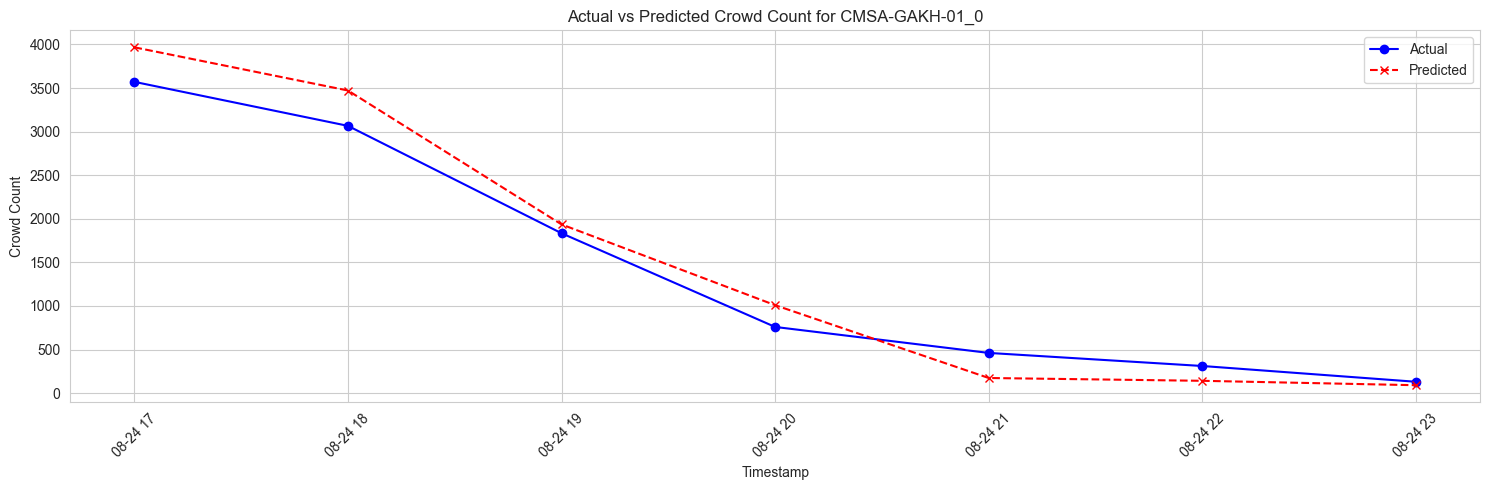

In [320]:
# === Settings ===
sensor_to_plot = 'CMSA-GAKH-01_0'  # change to any sensor you like
n_plot_hours = 48  # number of hours to plot, optional

# Find sensor index
sensor_idx = sensor_cols.index(sensor_to_plot)

# Extract actual and predicted values
y_actual = y_test[:, sensor_idx]
y_predicted = preds_test[:, sensor_idx]
timestamps_plot = times_test

# If you want to zoom on the first n_plot_hours
timestamps_plot = timestamps_plot[:n_plot_hours]
y_actual = y_actual[:n_plot_hours]
y_predicted = y_predicted[:n_plot_hours]

# === Plot ===
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")

plt.plot(timestamps_plot, y_actual, marker='o', linestyle='-', label='Actual', color='blue')
plt.plot(timestamps_plot, y_predicted, marker='x', linestyle='--', label='Predicted', color='red')

plt.title(f'Actual vs Predicted Crowd Count for {sensor_to_plot}')
plt.xlabel('Timestamp')
plt.ylabel('Crowd Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

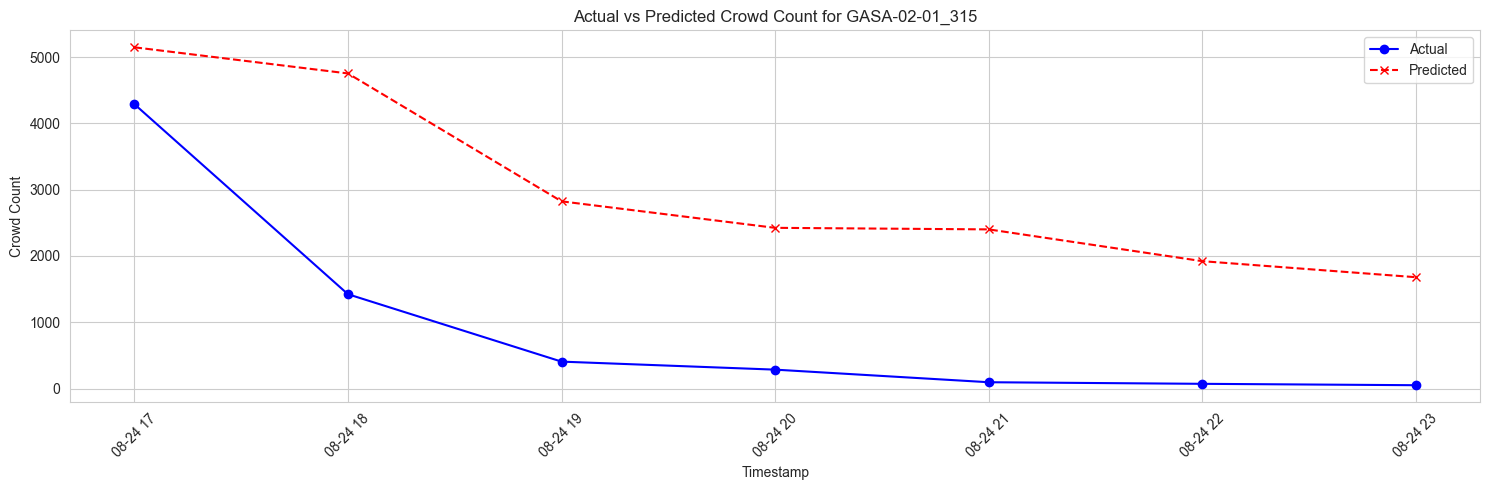

In [321]:

# === Settings ===
sensor_to_plot = 'GASA-02-01_315'  # change to any sensor you like
n_plot_hours = 48  # number of hours to plot, optional

# Find sensor index
sensor_idx = sensor_cols.index(sensor_to_plot)

# Extract actual and predicted values
y_actual = y_test[:, sensor_idx]
y_predicted = preds_test[:, sensor_idx]
timestamps_plot = times_test

# If you want to zoom on the first n_plot_hours
timestamps_plot = timestamps_plot[:n_plot_hours]
y_actual = y_actual[:n_plot_hours]
y_predicted = y_predicted[:n_plot_hours]

# === Plot ===
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")

plt.plot(timestamps_plot, y_actual, marker='o', linestyle='-', label='Actual', color='blue')
plt.plot(timestamps_plot, y_predicted, marker='x', linestyle='--', label='Predicted', color='red')

plt.title(f'Actual vs Predicted Crowd Count for {sensor_to_plot}')
plt.xlabel('Timestamp')
plt.ylabel('Crowd Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()